# Part 1: Analysing the Musical Characteristics of Top Spotify Hits in 2023

**Introduction**

This project **aims to analyze characteristics of the most streamed songs on Spotify in 2023 and predict the most streamed songs in 2024**, aiming to uncover their key musical characteristics. By employing libraries such as **Pandas, NumPy, and Matplotlib, as well as TensorFlow and model from libary statsmodels** in order to build models for predictions and analysis, I'll explore features like number of artists involved, streams count,	bpm 	danceability, valence, energy, acousticness, instrumentalness, liveness and speechiness. The analysis is conducted using the "Most Streamed Spotify Songs 2023" dataset sourced from Kaggle (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data). The goal is to provide insights into the factors driving song popularity. Additionally, I'll investigate the relationship between these musical attributes and how they influence each other.

**This is the first part of the project**. The second part will involve building a model that, based on data about the most popular songs from 2023, will attempt to predict which songs will be popular in 2024. The final results of the second part will be available on my GitHub (https://github.com/AleksandraGrabowska04) in January 2025 when the list of hits from 2024 will be published. Only then will it be possible to verify my predictions and write a complete documentation for the second part of the project.

# 1. Data overview

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import statsmodels.api as sm

In [ ]:
# Load data
for dirname, _, filenames in os.walk('/songs_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# View data
data = pd.read_csv('/content/songs_data/spotify-2023.csv', encoding='latin-1')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    int64  
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

This DataFrame contains data on **953 songs**, each represented by various **features including track name, artist name, release date, streaming statistics, and musical characteristics**. The dataset provides insights into the popularity and musical attributes of songs streamed on various platforms like Spotify, Apple Music, Deezer, and Shazam. The dataset comprises a mix of numerical and categorical data types, with most features being represented as **integers**, and a few as **strings (objects)** and **floating-point** numbers. **In this project**, I will **focus primarily on** the data related to songs streamed on the **Spotify platform**.

In [ ]:
# Count missing values for each column
print(data.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


Most columns do not have any missing values, indicating that the dataset is relatively complete. There are missing values in the **"in_shazam_charts" and "key" columns, with 50 and 95 missing values** respectively.

In [ ]:
# List of Musical Characteristics
characteristics = data.columns[-10:]

for col in characteristics:
  print(col)

bpm
key
mode
danceability_%
valence_%
energy_%
acousticness_%
instrumentalness_%
liveness_%
speechiness_%


In [ ]:
# All columns in dataset
for col in data.columns:
  print(col)

track_name
artist(s)_name
artist_count
released_year
released_month
released_day
in_spotify_playlists
in_spotify_charts
streams
in_apple_playlists
in_apple_charts
in_deezer_playlists
in_deezer_charts
in_shazam_charts
bpm
key
mode
danceability_%
valence_%
energy_%
acousticness_%
instrumentalness_%
liveness_%
speechiness_%


In [ ]:
# Extracting Spotify Data
spotify_columns = [col for col in data.columns if any(platform in col for platform in ['apple', 'deezer', 'shazam'])]
spotify_data = data.drop(columns=spotify_columns)

for col in spotify_data.columns:
  print(col)

track_name
artist(s)_name
artist_count
released_year
released_month
released_day
in_spotify_playlists
in_spotify_charts
streams
bpm
key
mode
danceability_%
valence_%
energy_%
acousticness_%
instrumentalness_%
liveness_%
speechiness_%


In [ ]:
spotify_data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.138470e+08,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.666301e+08,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.417210e+08,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.902286e+08,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738011e+08,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Based on the data regarding song characteristics, we can observe:

The average number of artists involved in creating a song is approximately 1 or 2. The songs in the dataset span release years from 1930 to 2023, with an average release year of approximately 2018.

The average **BPM** (beats per minute) of songs is approximately 122.54, indicating a moderate tempo. Additionally, the average **danceability** percentage is approximately 66.97%, suggesting that the majority of songs are suitable for dancing. The average **valence** percentage (positivity) is approximately 51.43%, indicating a neutral to slightly positive mood in the songs.

Furthermore, the average **energy** percentage of songs is approximately 64.28%, suggesting a moderate level of energy. The average **acousticness** percentage (how acoustic a track is) is approximately 27.06%, indicating that many songs have a blend of acoustic and electronic elements. The average **instrumentalness** percentage (presence of vocals vs. instrumental parts) is approximately 1.58%, suggesting that most songs contain vocals rather than being purely instrumental.

Moreover, the average **liveness** percentage (probability that the song was performed live) is approximately 18.21%, indicating that the majority of songs are studio recordings rather than live performances. Finally, the average **speechiness** percentage (presence of spoken words in the track) is approximately 10.13%, suggesting that spoken words are relatively infrequent in the songs.

# 2. The most popular artists


In [ ]:
# Finding the most popular artist
spotify_data['artist(s)_name'].value_counts()

Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: artist(s)_name, Length: 645, dtype: int64

Conclusions:

**Taylor Swift** appears the most frequently on the list with **34 entries**. **The Weeknd** follows with **22 entries**, while **Bad Bunny and SZA** tie at **19 entries each**. **Harry Styles** is close behind with **17 entries**. There are a total of 645 unique artists listed, each with their respective number of appearances on the list.

# 3. Analysis of all top most streamed songs and their characteristics

## 3.1 Top 20 most streamed songs

In [ ]:
# Top 20 most streamed songs
songs_sorted = spotify_data.sort_values(by='streams', ascending=False)

top_20_streamed = songs_sorted.head(20)

for index, row in top_20_streamed.iterrows():
    print(row['track_name'], " - ", row['artist(s)_name']," - ",row['streams'])

Blinding Lights  -  The Weeknd  -  3703895074
Shape of You  -  Ed Sheeran  -  3562543890
Someone You Loved  -  Lewis Capaldi  -  2887241814
Dance Monkey  -  Tones and I  -  2864791672
Sunflower - Spider-Man: Into the Spider-Verse  -  Post Malone, Swae Lee  -  2808096550
One Dance  -  Drake, WizKid, Kyla  -  2713922350
STAY (with Justin Bieber)  -  Justin Bieber, The Kid Laroi  -  2665343922
Believer  -  Imagine Dragons  -  2594040133
Closer  -  The Chainsmokers, Halsey  -  2591224264
Starboy  -  The Weeknd, Daft Punk  -  2565529693
Perfect  -  Ed Sheeran  -  2559529074
Heat Waves  -  Glass Animals  -  2557975762
As It Was  -  Harry Styles  -  2513188493
Senorita  -  Shawn Mendes, Camila Cabello  -  2484812918
Say You Won't Let Go  -  James Arthur  -  2420461338
lovely - Bonus Track  -  Billie Eilish, Khalid  -  2355719893
Watermelon Sugar  -  Harry Styles  -  2322580122
Don't Start Now  -  Dua Lipa  -  2303033973
Lucid Dreams  -  Juice WRLD  -  2288695111
Sweater Weather  -  The Neighb

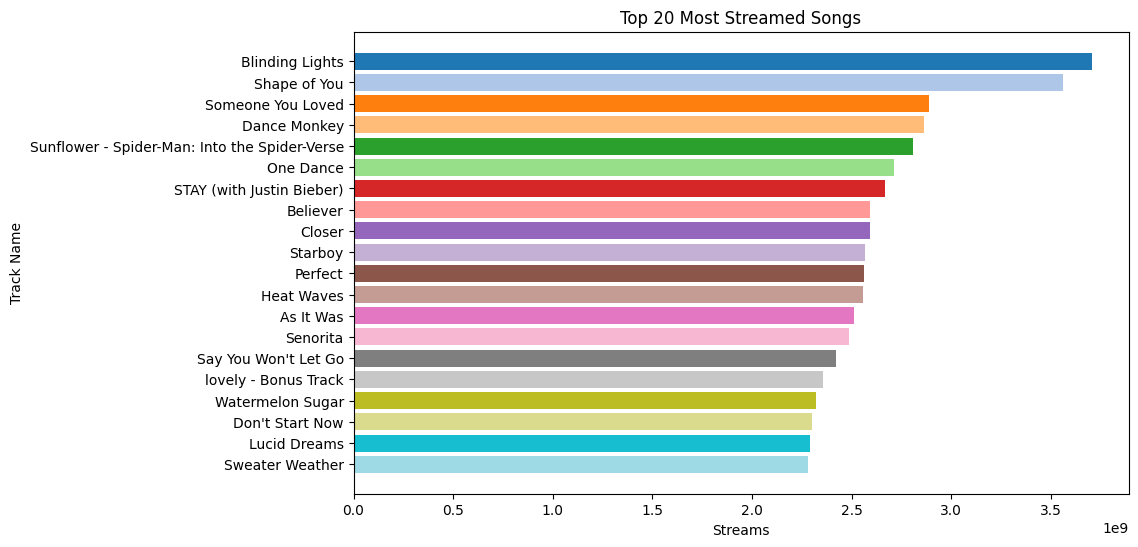

In [ ]:
# Plot for 20 most streamed songs

# Adding colors to differentiate each bar on the chart and make it visually distinct
colors = plt.cm.tab20(range(len(top_20_streamed)))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_20_streamed['track_name'], top_20_streamed['streams'], color=colors)
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.title('Top 20 Most Streamed Songs')

# Inverting the y-axis to display the most streamed songs at the top
plt.gca().invert_yaxis()

plt.show()

For the top 20 most streamed songs, we can observe the following conclusions:

 **"Blinding Lights"** by The Weeknd **leads the list** with an astonishing 3,703,895,074 streams, making it the most streamed song. "Shape of You" by Ed Sheeran follows closely behind with 3,562,543,890 streams, securing the second position. "Someone You Loved" by Lewis Capaldi ranks third with 2,887,241,814 streams, maintaining a strong presence among listeners. "Dance Monkey" by Tones and I and "Sunflower - Spider-Man: Into the Spider-Verse" by Post Malone & Swae Lee round up the top five with 2,864,791,672 streams and 2,808,096,550 streams respectively.

# Bottom 20 most streamed songs

In [ ]:
# Bottom 20 most streamed songs
bottom_20_streamed = songs_sorted.tail(20)

for index, row in bottom_20_streamed.iterrows():
    print(row['track_name'], " - ", row['artist(s)_name']," - ",row['streams'])

Savior - Interlude  -  Kendrick Lamar  -  37091576
Mine (Taylor's Version)  -  Taylor Swift  -  36912123
Don't ever say love me (feat. RM of BTS)  -  RM, Colde  -  34502215
Born With A Beer In My Hand  -  Morgan Wallen  -  34450974
Mother I Sober (feat. Beth Gibbons of Portishead)  -  Kendrick Lamar, Beth Gibbons  -  33381454
Link Up (Metro Boomin & Don Toliver, Wizkid feat. BEAM & Toian) - Spider-Verse Remix (Spider-Man: Across the Spider-Verse )  -  WizKid, Toian, Metro Boomin, Don Toliver, Beam  -  32761689
Devil Donï¿½ï¿½ï¿½  -  Morgan Wallen  -  32526947
Phantom Regret by Jim  -  The Weeknd  -  31959571
Mi Bello Angel  -  Natanael Cano  -  31873544
What Was I Made For? [From The Motion Picture "Barbie"]  -  Billie Eilish  -  30546883
Better Than Revenge (Taylor's Version)  -  Taylor Swift  -  30343206
New Jeans  -  NewJeans  -  29562220
Danger (Spider) (Offset & JID)  -  Offset, JID  -  24975653
Rush  -  Troye Sivan  -  22581161
S91  -  Karol G  -  16011326
Overdrive  -  Post Malo

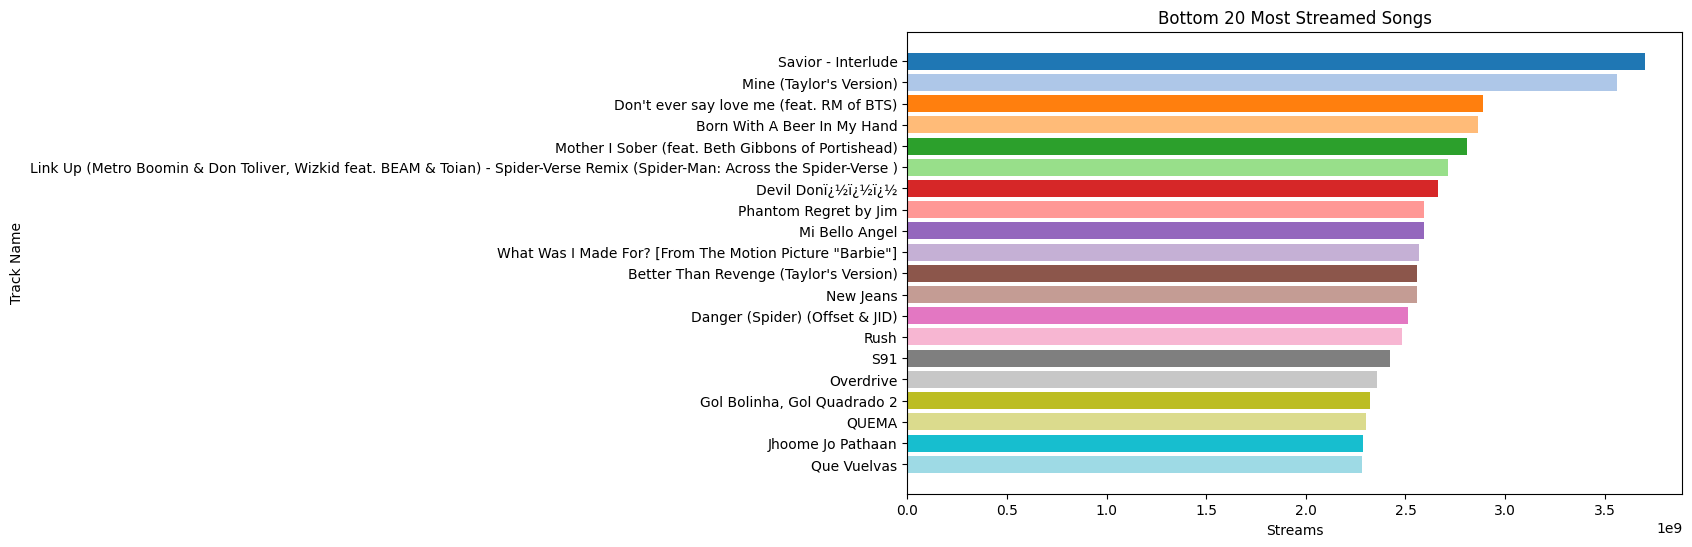

In [ ]:
# Plot for bottom 20 most streamed songs

# Adding colors to differentiate each bar on the chart and make it visually distinct
colors = plt.cm.tab20(range(len(top_20_streamed)))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(bottom_20_streamed['track_name'], top_20_streamed['streams'], color=colors)
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.title('Bottom 20 Most Streamed Songs')

# Inverting the y-axis to display the most streamed songs at the top
plt.gca().invert_yaxis()

plt.show()

Similarly, for the list of songs provided, we can derive the following conclusions:

 **"Savior - Interlude"** by Kendrick Lamar emerges as **the most streamed song of bottom 20**, garnering a remarkable 37,091,576 streams and claiming the top spot. It is closely followed by "Mine (Taylor's Version)" by Taylor Swift and "Don't ever say love me (feat. RM of BTS)" by RM and Colde, with stream counts of 36,912,123 and 34,502,215 respectively. "Born With A Beer In My Hand" by Morgan Wallen and "Mother I Sober (feat. Beth Gibbons of Portishead)" by Kendrick Lamar and Beth Gibbons secure the fourth and fifth positions with stream counts of 34,450,974 and 33,381,454 respectively. Furthermore, it's important to note **the least streamed** songs from the list. Among these, **"Que Vuelvas"** by Carin Leon and Grupo Frontera stands out as the least streamed song, with a mere 2762 streams, indicating its relatively low popularity compared to the others listed.

## 3.2 Exploring relationship between all musical characteristics

In [ ]:
# Extract columns with numeric variables
num_data = spotify_data.select_dtypes(include='int64').copy()

# Drop the 'released_month', 'released_day', 'released_year', 'in_spotify_playlists', 'in_spotify_charts'
num_data = num_data.drop(columns=['released_month','released_day', 'released_year', 'in_spotify_playlists', 'in_spotify_charts'])

num_data.head()

,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,141381703,125,80,89,83,31,0,8,4
1,1,133716286,92,71,61,74,7,0,10,4
2,1,140003974,138,51,32,53,17,0,31,6
3,1,800840817,170,55,58,72,11,0,11,15
4,1,303236322,144,65,23,80,14,63,11,6


### 3.2.1 Histograms for statistics of each musical characteristic

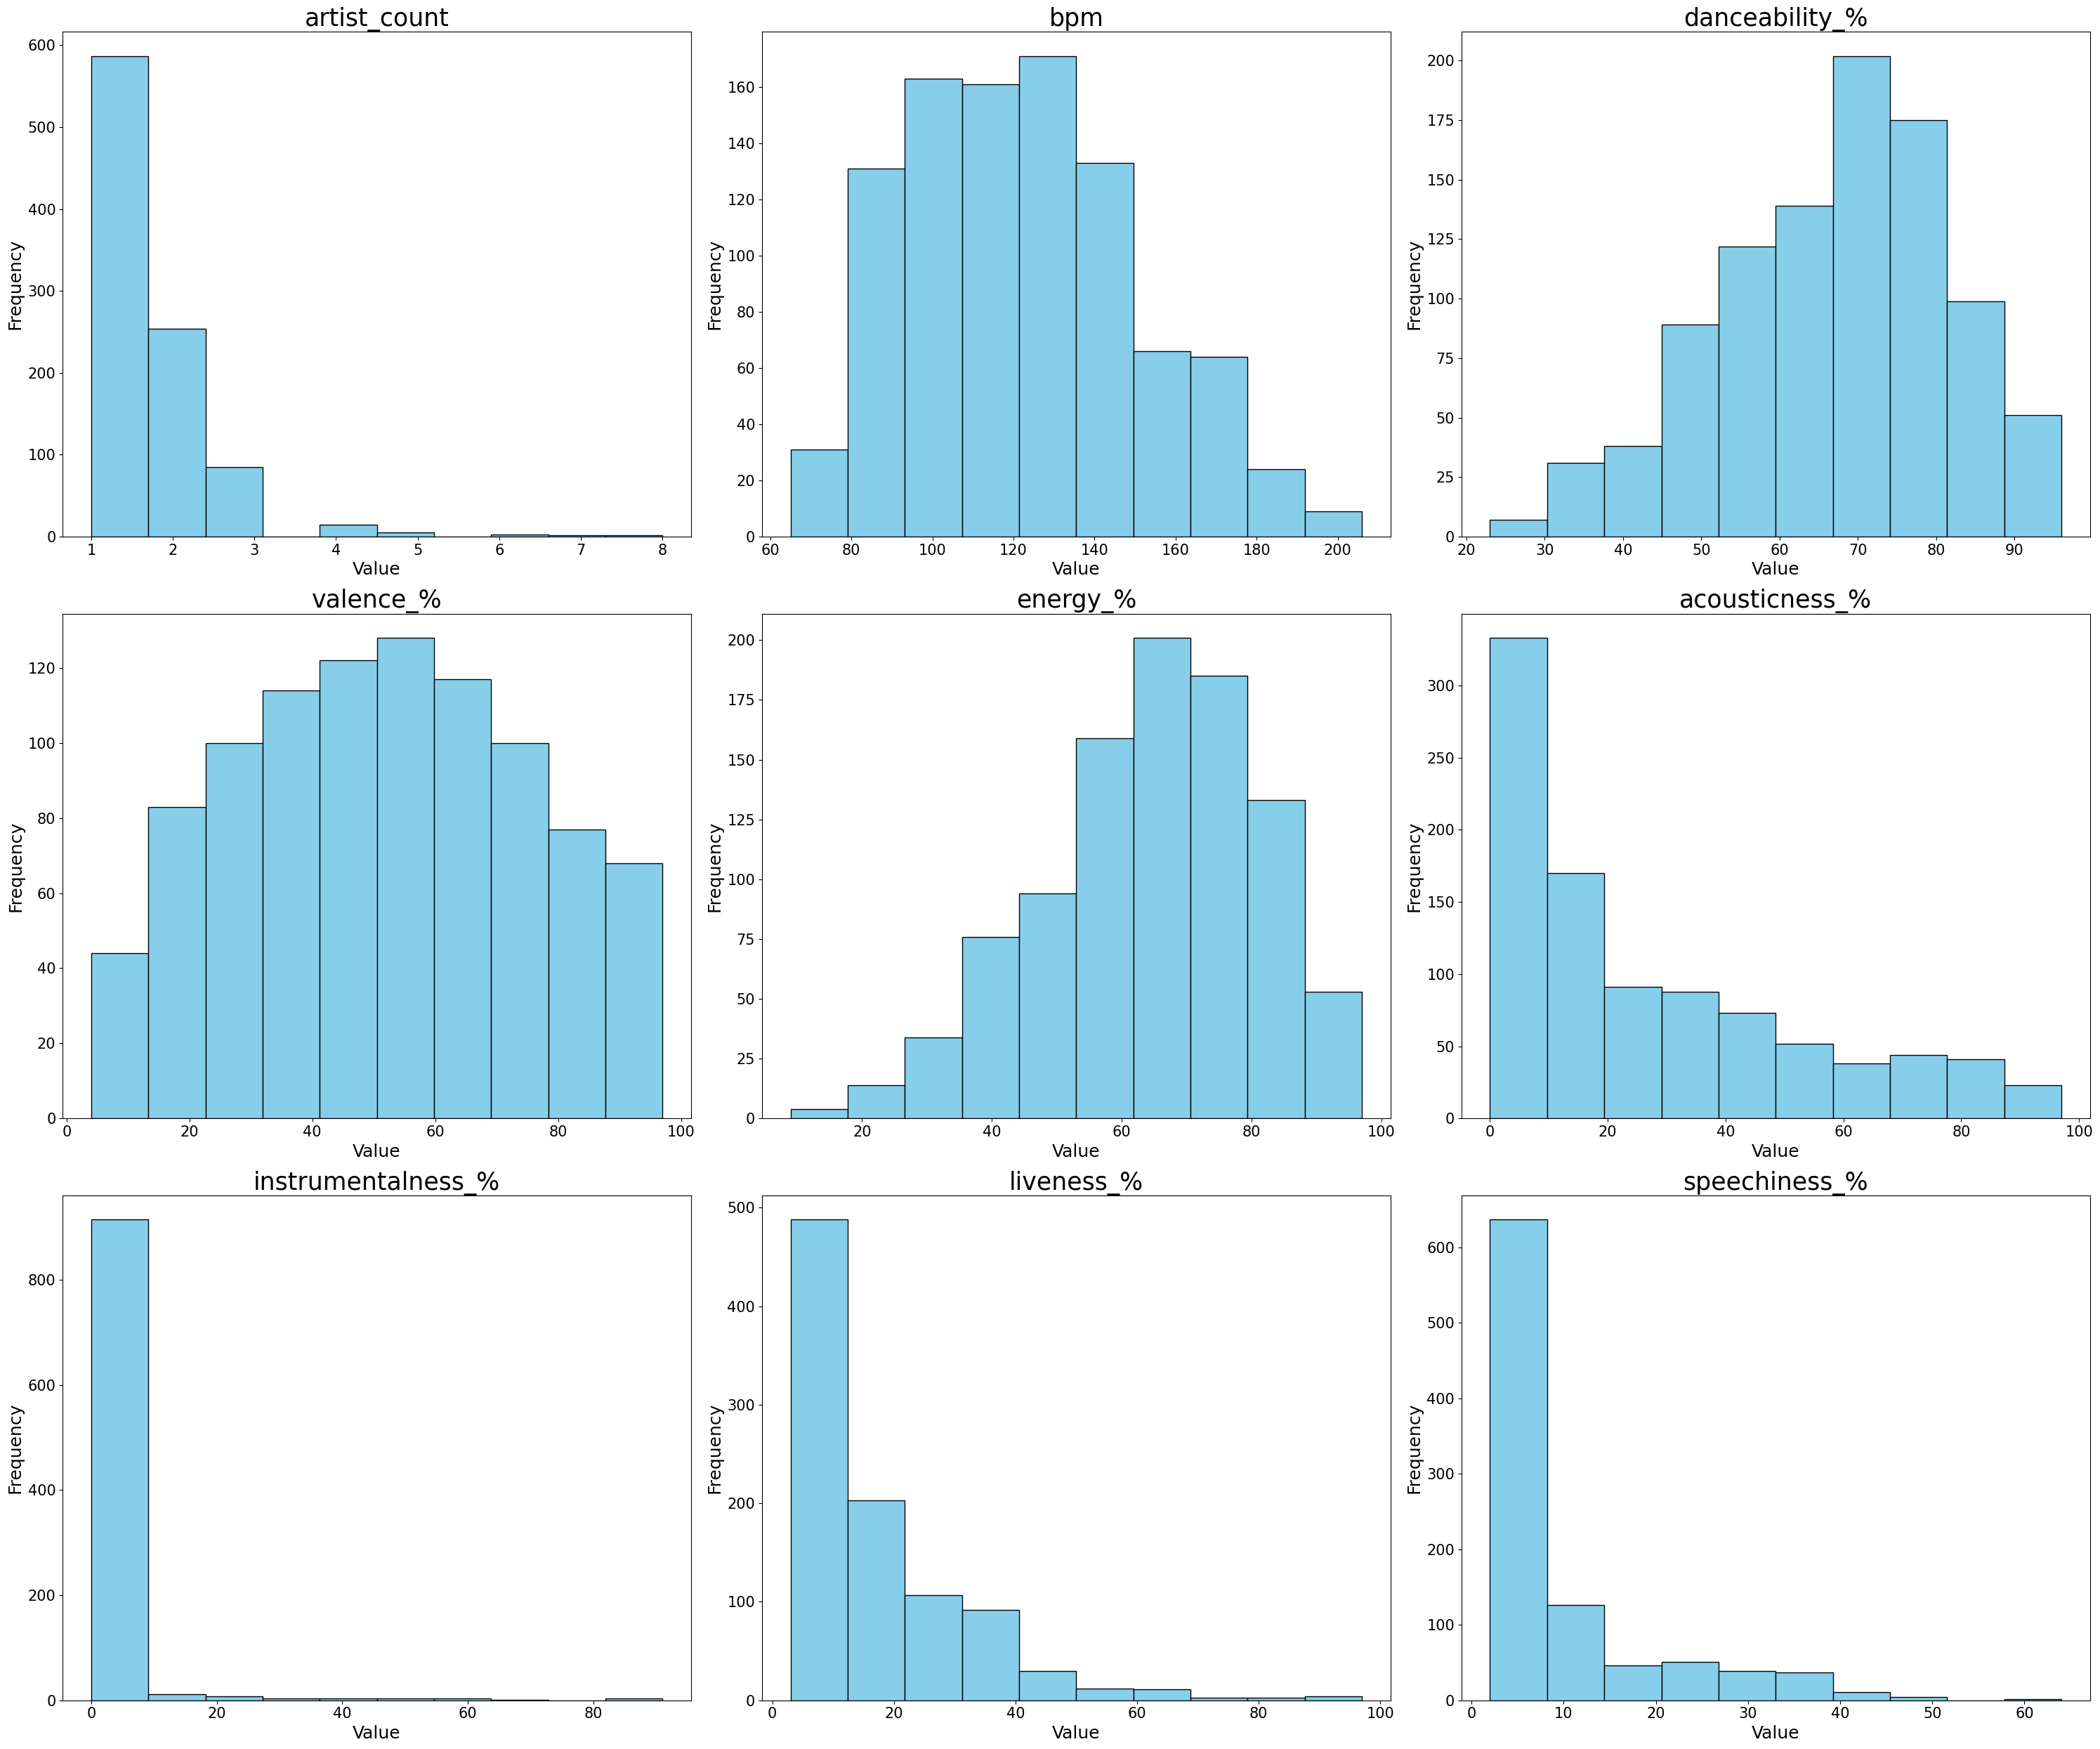

In [117]:
# Histograms for statistics of each musical characteristic
plt.figure(figsize=(30, 25))

features = ['artist_count', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.hist(num_data[feature], bins=10, color='skyblue', edgecolor='black')
    plt.title(feature, fontsize=25)
    plt.xlabel('Value', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tight_layout()

plt.show()

The analysis of histograms provides valuable insights into the relationship between different musical characteristics:

The **majority of songs** in the dataset have **either one or two artists**, with nearly 600 songs featuring a single artist and approximately 260 songs featuring two artists.
Regarding **BPM** (Beats Per Minute), the highest number of streams corresponds to **tracks with a BPM of 120, closely followed by those with a BPM of 90**. The histogram for **danceability** indicates that tracks with a danceability percentage **around 70%** are the most streamed.
When examining **valence**, the highest number of streams is associated with tracks having a valence **around 50%**.
In terms of **energy**, tracks with an energy percentage around **70%** receive the most streams. The histogram for **acousticness** shows that a significant portion of top streamed songs are not acoustic as the frequency is the highest for values **between 0% and 10%**. When it comes to **instrumentalness and liveness**, the highest frequency occurs for values **between 0% and 10%**, while other values have frequencies barely above zero. Lastly, for **speechiness**, the highest frequency is concentrated in values **similar to instrumentalness and liveness**, indicating a preference for tracks with more singing than speech. Overall, these histograms offer insights into the distribution of musical characteristics among the top streamed songs, highlighting **preferences among listeners for specific attributes such as BPM, danceability, and energy**, while also indicating a preference for **non-acoustic tracks and those with minimal instrumentalness, liveness, and speechiness**.

### 3.2.2 Correlation heatmap of musical characteristics

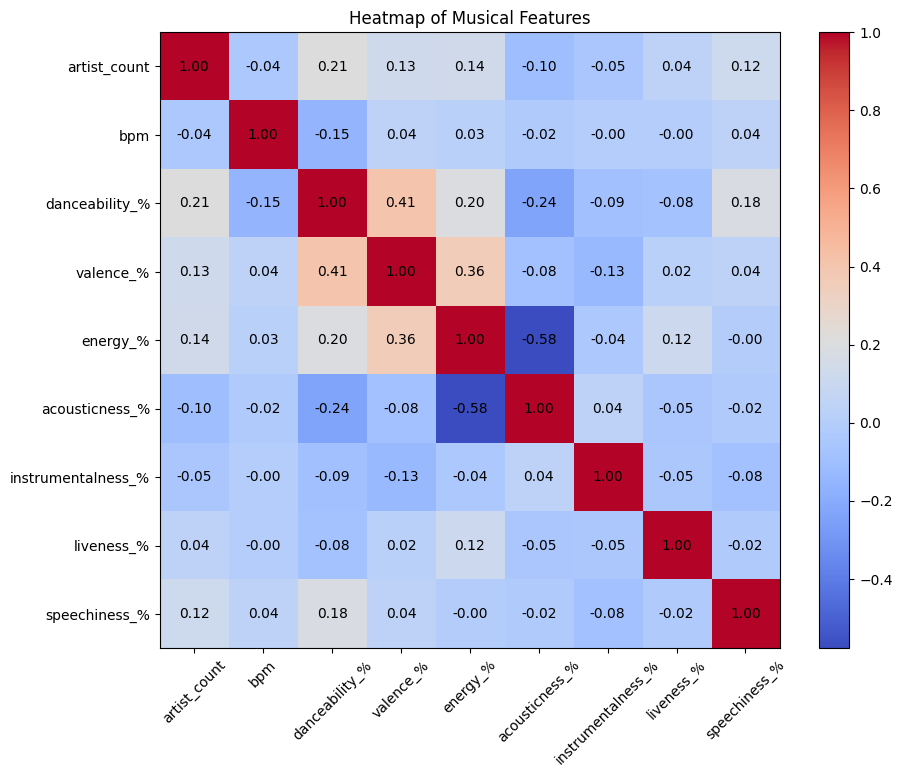

In [102]:
# Correlation heatmap of musical characteristics

correlation_matrix = num_data[['artist_count', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()

# Add annotations
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Add title and axis labels
plt.title('Heatmap of Musical Features')
feature_names = correlation_matrix.columns
plt.xticks(ticks=range(len(feature_names)), labels=feature_names, rotation=45)
plt.yticks(ticks=range(len(feature_names)), labels=feature_names)

plt.show()


Based on the correlation heatmap of musical features of the most popular songs of 2023, several conclusions can be drawn:

 The correlation coefficient between **'valence' and 'danceability'** is **0.41**, indicating a **moderate positive correlation** between these two features. This suggests that songs with higher valence tend to have higher danceability, and vice versa. The correlation coefficient between **'energy' and 'valence'** is **0.36**, implying a moderate positive correlation between these two features. This means that songs with higher energy levels also tend to have higher valence, and vice versa. Moreover, the correlation coefficient between '**energy' and 'acousticness'** is **-0.58**, indicating a moderate negative correlation. This shows that songs with higher energy levels tend to have lower acousticness, and vice versa. Additionally, **'danceability'** shows a **weak positive correlation with 'artist_count' (0.21), 'energy' (0.20), and 'speechiness' (0.18)**, suggesting some degree of association between these features. Overall, the heatmap provides valuable insights into the relationships among musical features, particularly highlighting the connections between valence, danceability, energy, and acousticness.

---



### 3.2.3 Relationships Among key musical characteristics from the heatmap

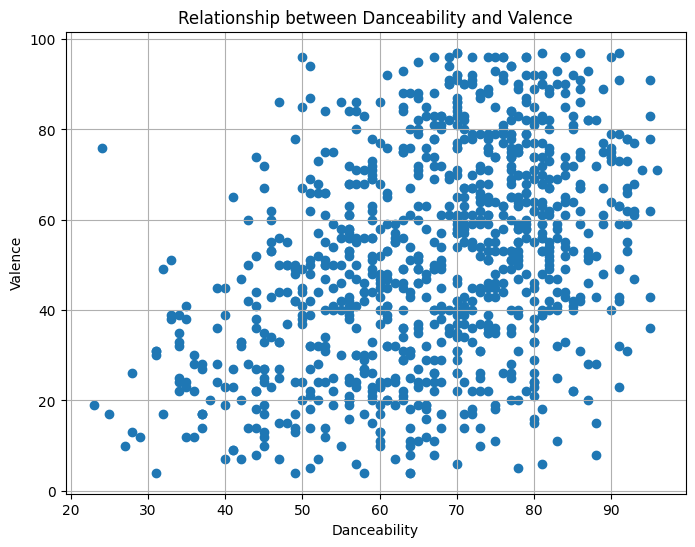

In [79]:
# Danceability and Valence
x = num_data['danceability_%']
y = num_data['valence_%']

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Relationship between Danceability and Valence')
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.grid(True)
plt.show()

The scatter plot between valence and danceability serves as an additional comparison to complement the insights provided by the heatmap. It offers a more detailed analysis of the relationship between these two features, allowing for a deeper understanding of their correlation. The observed pattern of points forming a **slightly oval shape tilted towards the upper right corner** indicates a **positive correlation** between these two features. **Points are slightly clustered close to one another**, in the region **where the oval shape approaches the upper right corner**, they are most densely clustered especially **between 70 and 80 on the x-axis** (representing danceability) and **between 40 and 80 on the y-axis** (representing valence). This suggests that **songs with higher valence tend to also have higher danceability, and vice versa**. Overall, this indicates a tendency for songs with similar valence and danceability levels to be grouped together.

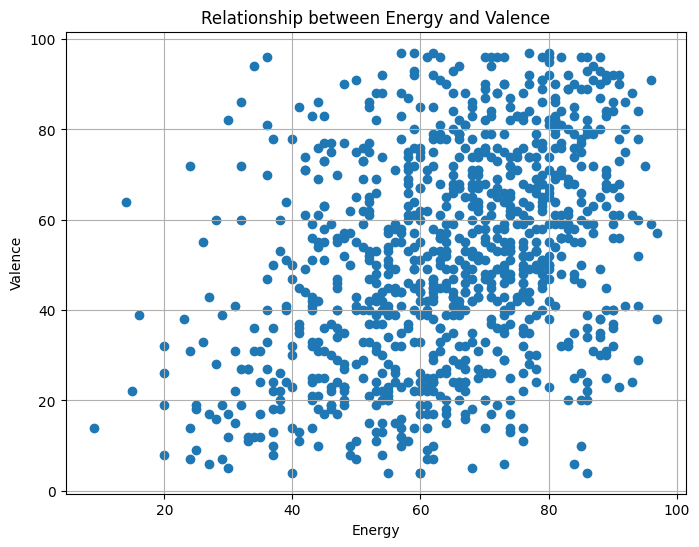

In [80]:
# Energy and Valence
x = num_data['energy_%']
y = num_data['valence_%']

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Relationship between Energy and Valence')
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.grid(True)
plt.show()

The scatter plot illustrates the relationship between Energy and Valence, revealing a slightly **oval shape tilted towards the upper right corner** of the plot. **Points are closely clustered together**, particularly in the range **from approximately 40 to 90 on the x-axis** (representing energy) and **between 20 and 100 on the y-axis** (representing valence). This clustering indicates a strong positive correlation between Energy and Valence, suggesting that **songs with higher energy levels also tend to have higher valence, and vice versa**. Additionally, the concentration of points in this specific range further emphasizes the relationship between these two musical attributes, indicating that songs with similar energy and valence levels tend to be grouped together.

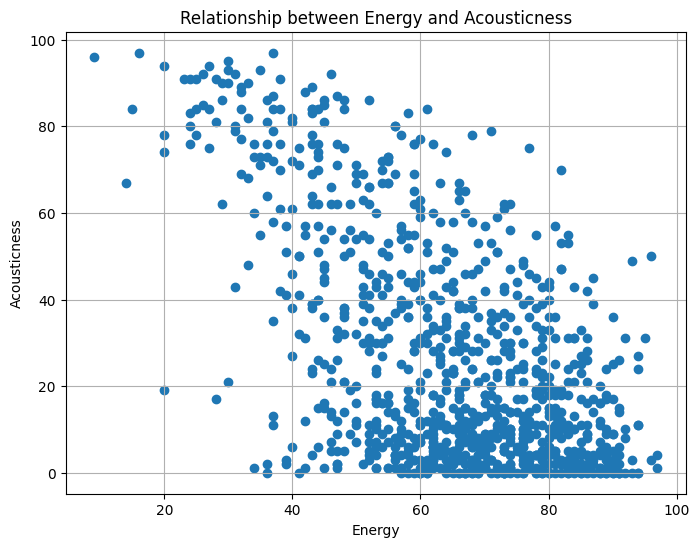

In [81]:
# Energy and Acousticness
x = num_data['energy_%']
y = num_data['acousticness_%']

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Relationship between Energy and Acousticness')
plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.grid(True)
plt.show()

The scatter plot illustrates the relationship between energy and acousticness. The** pattern of points is directed towards the lower right corner of the plot**, indicating a negative correlation between these two features. **The highest concentration of points** can be observed for values ranging **from approximately 50 to 95 on the x-axis** (representing energy) and **from 0 to 20 on the y-axis** (representing acousticness). This suggests that songs with higher energy levels tend to have lower acousticness, and vice versa.

## 3.3 Exploring relationship between musical characteristics and stream count

In [118]:
# Linear regression model of relationship between musical characteristics and stream count
X = num_data[['artist_count', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
y = num_data['streams']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                streams   R-squared (uncentered):                 -77.686
Model:                            OLS   Adj. R-squared (uncentered):            -78.436
Method:                 Least Squares   F-statistic:                             -103.6
Date:                Sat, 30 Mar 2024   Prob (F-statistic):                        1.00
Time:                        13:49:42   Log-Likelihood:                         -20560.
No. Observations:                 953   AIC:                                  4.114e+04
Df Residuals:                     944   BIC:                                  4.118e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

The linear regression analysis conducted on the relationship between musical features and the number of streams gives the following results:

The **overall model fit**, as indicated by the R-squared value, is **quite low**, with an uncentered **R-squared of -77.686%**. The **coefficients for each feature indicate the strength and direction of their relationship with the number of streams**. Features such as **bpm, energy, and acousticness show statistically significant relationships with stream count**, as their **coefficients have p-values less than 0.05**. On the other hand, features like **valence, instrumentalness, and liveness do not show statistically significant relationships with stream count**, as their **coefficients have p-values greater than 0.05**. Although **the F-statistic**, which tests the overall significance of the model, is also **negative**, indicating that the **model is not a good fit for the data**, these results suggest that certain musical features, such as bpm, energy level, and acousticness, may have a significant impact on the number of streams a song receives, while others may not have a significant effect.

# 4. Summary

The analysis of song characteristics reveals several key insights. Firstly, **the dataset predominantly consists of songs featuring either one or two artists**, with approximately 600 songs featuring a single artist and around 260 songs featuring two artists. Moreover, **songs in the dataset span from 1930 to 2023, with an average release year around 2018.**

Moving on to musical attributes,** the average BPM of songs is approximately 122.54**, indicating a moderate tempo. Interestingly, the highest number of streams corresponds to tracks with BPM values of 120 and 90, suggesting a preference for songs with these tempos among listeners. Additionally, most streamed songs have a **danceability percentage around 70%**, indicating that they are **suitable for dancing**.

In terms of mood, the highest number of streams is associated with tracks having **valence around 50%**, indicating a neutral to **slightly positive mood preferred by listeners**. Moreover, tracks with **energy percentages around 70%** receive the most streams, suggesting a **preference for moderately energetic songs**.

Regarding acoustic attributes, a significant portion of top streamed songs have **low acousticness, with the highest frequency observed for values between 0% and 10%**. This indicates a **preference among listeners for non-acoustic tracks**. **Similarly, both instrumentalness and liveness** show the highest frequency for values between 0% and 10%, suggesting a preference for tracks with minimal instrumentalness and liveness.

In terms of spoken content, songs with higher **speechiness values are relatively infrequent** among the top streamed songs, indicating a **preference for tracks with more singing than speech**.

Furthermore, correlation analysis reveals **moderate positive correlations between valence and danceability, energy and valence**, while **energy shows a negative correlation with acousticness**. These correlations provide insights into the relationships between different musical attributes.

Finally, linear regression analysis suggests that **certain musical features like BPM, energy level, and acousticness may have a significant impact on stream count**, while others like **valence, instrumentalness, and liveness may not**. However, the overall model fit is relatively low, indicating the presence of other influential factors not accounted for in the analysis.

In conclusion, the analysis provides valuable insights into the preferences of listeners regarding various musical attributes and their impact on the popularity of songs.